# Apprentissage Supervisée ( la meme dataset de le premier projet d'apprentissage non supervisée)

# 1)- import les outils      2)- traitement de données

In [1]:
#Importation des bibliothéque
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
#Import de dataset et afficher les 5 premier lignes
data=pd.read_csv("OnlineR.csv",sep=",")
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
#Afficher le dimension de dataset et Repartion des données par la variable Country  et compter la taill de chaque partie 
print(data.shape)
print('nombre de chaque country',data.groupby('Country').size())

(16285, 8)
nombre de chaque country Country
Australia            14
Belgium              12
EIRE                145
France              167
Germany             213
Iceland              31
Italy                25
Japan                16
Lithuania            34
Netherlands           2
Norway               73
Poland                8
Portugal             14
Spain                 5
Switzerland           6
United Kingdom    15520
dtype: int64


In [4]:
#Afficher les information de chaque caractéristiques telle que le type et compter le nombre de lignes non null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16285 entries, 0 to 16284
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    16285 non-null  object 
 1   StockCode    16285 non-null  object 
 2   Description  16225 non-null  object 
 3   Quantity     16285 non-null  int64  
 4   InvoiceDate  16285 non-null  object 
 5   UnitPrice    16285 non-null  float64
 6   CustomerID   10820 non-null  float64
 7   Country      16285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1017.9+ KB


In [5]:
#Afficher les types des caractéristiques
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
#Supprimer les lignes qui a des valeurs manquants
data=data.dropna()
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [7]:
data.shape
print('nombre de chaque country',data.groupby('Country').size())

nombre de chaque country Country
Australia            14
Belgium              12
EIRE                134
France              167
Germany             213
Iceland              31
Italy                25
Japan                16
Lithuania            34
Netherlands           2
Norway               73
Poland                8
Portugal             14
Spain                 5
Switzerland           6
United Kingdom    10066
dtype: int64


In [8]:
#Resumé statistiques des caractéristiques
data.describe()

,Quantity,UnitPrice,CustomerID
count,10820.000000,10820.000000,10820.000000
mean,9.328558,3.124864,15605.572181
std,100.930999,5.312749,1764.310810
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.250000,14282.000000
50%,4.000000,2.100000,15708.000000
75%,12.000000,3.750000,17223.000000
max,2880.000000,295.000000,18239.000000


# Transferer les données alpha numérique en des données numérique

In [9]:
data_cat=data.drop(['Quantity','UnitPrice','CustomerID'],axis=1)
data_cat.head(5)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,01-12-2010 08:26,United Kingdom
1,536365,71053,WHITE METAL LANTERN,01-12-2010 08:26,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,01-12-2010 08:26,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,01-12-2010 08:26,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,01-12-2010 08:26,United Kingdom


In [10]:
country=[data['Country']]
uqcountry=np.unique(country)
print(uqcountry)
tab=[i for i in range(len(uqcountry))]
tab

['Australia' 'Belgium' 'EIRE' 'France' 'Germany' 'Iceland' 'Italy' 'Japan'
 'Lithuania' 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Spain'
 'Switzerland' 'United Kingdom']


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [11]:
data['Country']=data['Country'].replace(['Australia', 'Belgium', 'EIRE', 'France', 'Germany', 'Iceland',
       'Italy', 'Japan', 'Lithuania', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Spain', 'Switzerland', 'United Kingdom'],tab)
data['Country']

0        15
1        15
2        15
3        15
4        15
         ..
16280    15
16281    15
16282    15
16283    15
16284    15
Name: Country, Length: 10820, dtype: int64

In [12]:
InvoiceNo=[data['InvoiceNo']]
uqInvoiceNo=np.unique(InvoiceNo)
print(uqInvoiceNo)
tab2=[i for i in range(len(uqInvoiceNo))]
tab2

['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374' '536375' '536376' '536377' '536378' '536380' '536381'
 '536382' '536384' '536385' '536386' '536387' '536388' '536389' '536390'
 '536392' '536393' '536394' '536395' '536396' '536397' '536398' '536399'
 '536400' '536401' '536402' '536403' '536404' '536405' '536406' '536407'
 '536408' '536409' '536412' '536415' '536416' '536420' '536423' '536425'
 '536437' '536446' '536460' '536463' '536464' '536466' '536477' '536488'
 '536500' '536502' '536508' '536514' '536520' '536521' '536522' '536523'
 '536524' '536525' '536526' '536527' '536528' '536529' '536530' '536531'
 '536532' '536533' '536534' '536535' '536536' '536537' '536538' '536539'
 '536540' '536541' '536542' '536551' '536556' '536557' '536559' '536560'
 '536561' '536562' '536563' '536564' '536566' '536567' '536568' '536569'
 '536570' '536571' '536572' '536573' '536574' '536575' '536576' '536577'
 '536578' '536579' '536580' '536581' '536582' '5365

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [13]:
data['InvoiceNo']=data['InvoiceNo'].replace(uqInvoiceNo,tab2)
data['InvoiceNo']

0          0
1          0
2          0
3          0
4          0
        ... 
16280    556
16281    556
16282    556
16283    556
16284    556
Name: InvoiceNo, Length: 10820, dtype: int64

In [14]:
StockCode=[data['StockCode']]
uqStockCode=np.unique(StockCode)
print(uqStockCode)
tab3=[i for i in range(len(uqStockCode))]
data['StockCode']=data['StockCode'].replace(uqStockCode,tab3)
data['StockCode']

['10002' '10120' '10123C' ... 'D' 'M' 'POST']


0        1762
1        1474
2        1584
3        1560
4        1559
         ... 
16280    1641
16281    1215
16282     263
16283    1348
16284    1092
Name: StockCode, Length: 10820, dtype: int64

In [15]:
InvoiceDate=[data['InvoiceDate']]
uqInvoiceDate=np.unique(InvoiceDate)
tab4=[i for i in range(len(uqInvoiceDate))]
data['InvoiceDate']=data['InvoiceDate'].replace(uqInvoiceDate,tab4)
data['InvoiceDate']

0          0
1          0
2          0
3          0
4          0
        ... 
16280    564
16281    564
16282    564
16283    564
16284    564
Name: InvoiceDate, Length: 10820, dtype: int64

In [16]:
Description=[data['Description']]
uqDescription=np.unique(Description)
tab5=[i for i in range(len(uqDescription))]
data['Description']=data['Description'].replace(uqDescription,tab5)
data['Description']

0        1797
1        1800
2         479
3         908
4        1353
         ... 
16280     590
16281    1667
16282    1114
16283     870
16284     860
Name: Description, Length: 10820, dtype: int64

In [17]:
print(data.head(10))
data.describe()

   InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0          0       1762         1797         6            0       2.55   
1          0       1474         1800         6            0       3.39   
2          0       1584          479         8            0       2.75   
3          0       1560          908         6            0       3.39   
4          0       1559         1353         6            0       3.39   
5          0       1192         1449         2            0       7.65   
6          0        502          738         6            0       4.25   
7          1       1100          794         6            1       1.85   
8          1       1099          791         6            1       1.85   
9          2       1660          121        32            2       1.69   

   CustomerID  Country  
0     17850.0       15  
1     17850.0       15  
2     17850.0       15  
3     17850.0       15  
4     17850.0       15  
5     17850.0       15  
6     1785

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,10820.000000,10820.000000,10820.000000,10820.000000,10820.000000,10820.000000,10820.000000,10820.000000
mean,303.006470,948.349630,946.785767,9.328558,299.955823,3.124864,15605.572181,14.275878
std,155.394004,487.148148,525.152735,100.930999,157.119454,5.312749,1764.310810,2.757867
min,0.000000,0.000000,0.000000,-9360.000000,0.000000,0.000000,12347.000000,0.000000
25%,177.000000,570.000000,535.000000,1.000000,165.000000,1.250000,14282.000000,15.000000
50%,330.500000,1016.000000,914.000000,4.000000,335.000000,2.100000,15708.000000,15.000000
75%,428.000000,1312.000000,1369.000000,12.000000,427.000000,3.750000,17223.000000,15.000000
max,623.000000,1864.000000,1870.000000,2880.000000,564.000000,295.000000,18239.000000,15.000000


array([[<AxesSubplot:title={'center':'InvoiceNo'}>,
        <AxesSubplot:title={'center':'StockCode'}>,
        <AxesSubplot:title={'center':'Description'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'InvoiceDate'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>],
       [<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Country'}>, <AxesSubplot:>]],
      dtype=object)

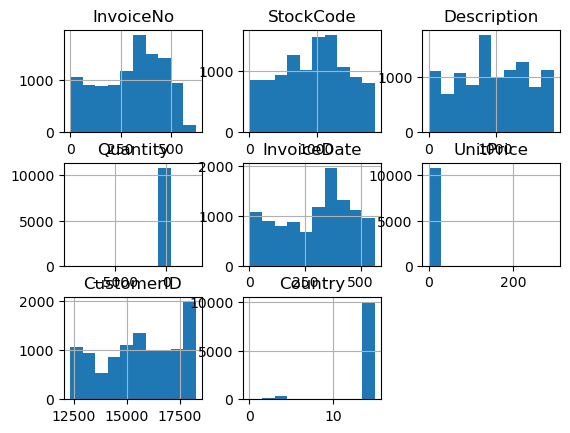

In [18]:
#Afficher les caractéristiques en un histogramme
data.hist()

# 3)- Selection de modèle

sklearn model_selection train_test_split

In [19]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

size de X_train (8656, 7)
size de X_test (2164, 7)


Text(0.5, 1.0, 'Test set')

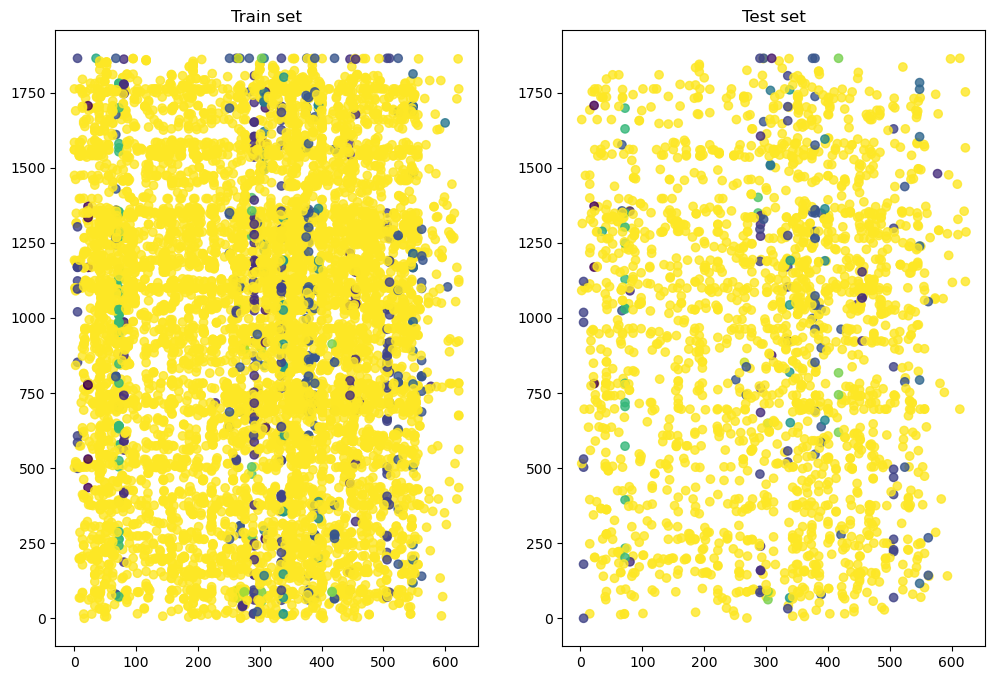

In [20]:
#Separation des données en jeu d'entrinement et jeu de test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print("size de X_train",x_train.shape)
print("size de X_test",x_test.shape)
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')

# Modéle

# sklearn.neighbors

1)- KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)

[15 15 15 ... 15 15 15]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Education (métriques)

sklearn.metrics

Accuracy =95% des prédictions du modèle sur le jeu de test sont correctes pour k=7.


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


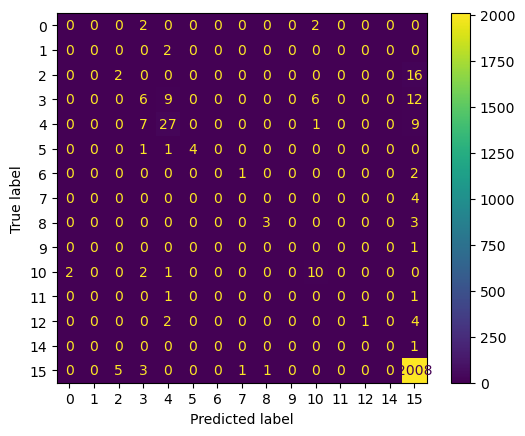

2008 country United Kingdom ont été correctement prédits .
95% des prédictions du modèle sur le jeu de test sont correctes.


In [25]:
print("Accuracy =%.f%% des prédictions du modèle sur le jeu de test sont correctes pour k=7."%(100*metrics.accuracy_score(y_test,y_pred)))
metrics.ConfusionMatrixDisplay.from_estimator(knn,x_test,y_test)
plt.show()
print("%d country United Kingdom ont été correctement prédits ."
      % metrics.confusion_matrix(y_test, y_pred)[14, 14])
print("%.f%% des prédictions du modèle sur le jeu de test sont correctes."
% (100*metrics.accuracy_score(y_test, y_pred)))

In [97]:
neighbors = np.arange(1,21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i] = knn.score(x_train,y_train)
    test_accuracy[i] = knn.score(x_test,y_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [98]:
print(test_accuracy)
print('le précision maximum',max(test_accuracy))

[0.96441774 0.94685767 0.9551756  0.94500924 0.95332717 0.94824399
 0.95240296 0.95286506 0.95332717 0.95378928 0.95055453 0.94731978
 0.9487061  0.94778189 0.94778189 0.94824399 0.94824399 0.94685767
 0.94731978 0.94778189]
le précision maximum 0.9644177449168208


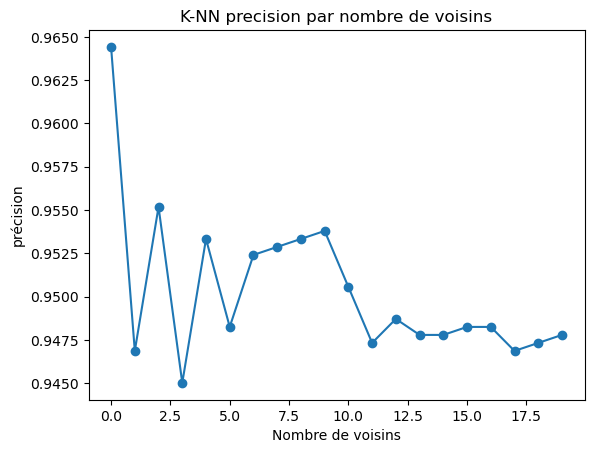

In [99]:
#visualisation taux de precision
plt.plot(test_accuracy,'o-')
plt.title('K-NN precision par nombre de voisins')
plt.xlabel('Nombre de voisins')
plt.ylabel('précision')
plt.show()

alors d'aprés le graphe le mielleur hyperparamétre k, pour avoir une meilleur classification c'est k=1

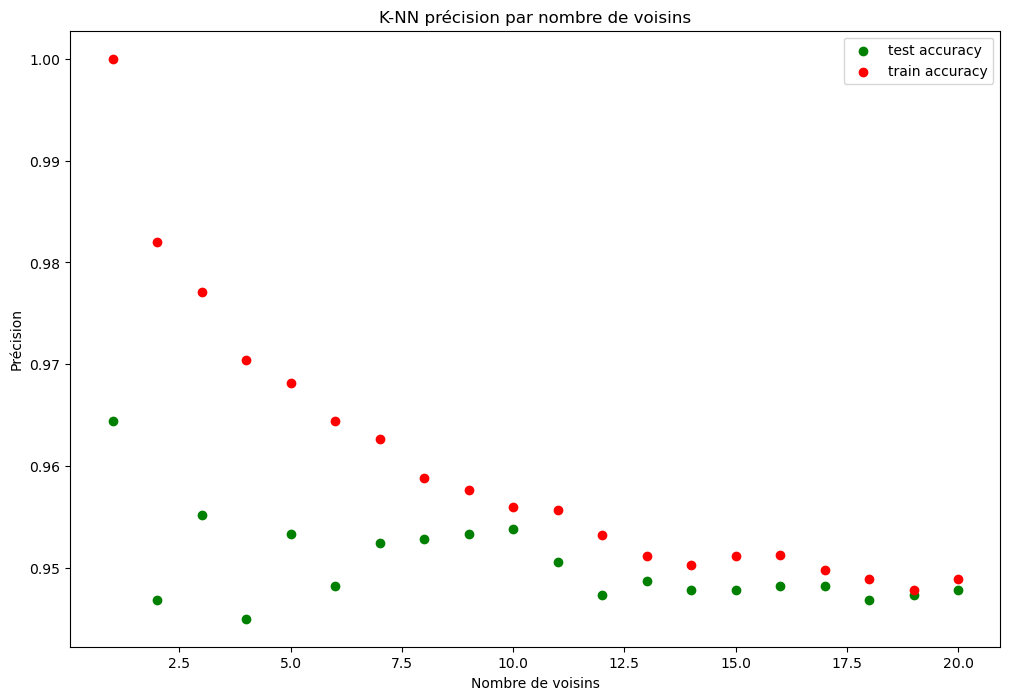

In [100]:
#Visualisation taux d'apprentissage et test
plt.figure(figsize=(12,8))
plt.title('K-NN précision par nombre de voisins')
plt.scatter(neighbors,test_accuracy,label="test accuracy", c="green")
plt.scatter(neighbors,train_accuracy,label="train accuracy", c="red")
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Précision')
plt.show()

In [101]:
#d'autre methode pour avoir le k optimale GriSearchCV et Cross-validée
from sklearn import model_selection
k_values = [1, 7, 9, 13, 15, 17, 19, 21]
params={'n_neighbors': k_values}
knnclass_cv = model_selection.GridSearchCV( knn, params, cv=5, scoring='accuracy')
knnclass_cv.fit(x_train, y_train)
print("La valeur optimale de k est %d, pour une accuracy cross-validée de %.f%%."
 % (knnclass_cv.best_params_['n_neighbors'], (100*knnclass_cv.best_score_)))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

La valeur optimale de k est 1, pour une accuracy cross-validée de 96%.


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [102]:
knn2=KNeighborsClassifier(n_neighbors=1)
knn2.fit(x_train,y_train)
y_pred=knn2.predict(x_test)
print(y_pred)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[15 15 15 ... 15 15 15]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy =96% des prédictions du modèle sur le jeu de test sont correctes pour k=1.


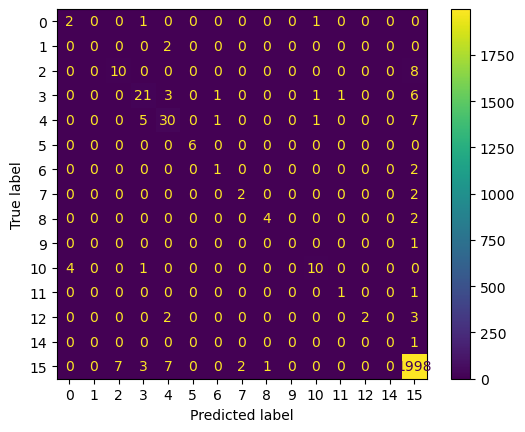

1998 country United Kingdom ont été correctement prédits .
20 country United Kingdom ont été incorrectement prédits autres.


array([   4,    2,   18,   33,   44,    6,    3,    4,    6,    1,   15,
          2,    7,    0,    1, 2018], dtype=int64)

In [103]:
#Evaluation du modele pour k=1
print("Accuracy =%.f%% des prédictions du modèle sur le jeu de test sont correctes pour k=1."%(100*metrics.accuracy_score(y_test,y_pred)))
metrics.ConfusionMatrixDisplay.from_estimator(knn2,x_test,y_test)
plt.show()
print("%d country United Kingdom ont été correctement prédits ."
      % metrics.confusion_matrix(y_test, y_pred)[14, 14])
print("20 country United Kingdom ont été incorrectement prédits autres.")
#compter pour chaque classe le nombre de données
np.bincount(y_test)

In [104]:
#Performance du modèle par GridSearchCV
from sklearn import model_selection
k_values = [1, 5, 7, 9, 13, 15, 17, 19, 21]
params={'n_neighbors': k_values}
knnclass_cv = model_selection.GridSearchCV( knn2, params, cv=5, scoring='accuracy')
knnclass_cv.fit(x_train, y_train)
print("La valeur optimale de k est %d, pour une accuracy cross-validée de %.f%%."
% (knnclass_cv.best_params_['n_neighbors'], (100*knnclass_cv.best_score_)))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

La valeur optimale de k est 1, pour une accuracy cross-validée de 96%.


# 2)- KNeighborsRegressor

[11.28571429 15.         15.         ... 15.         15.
 15.        ]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

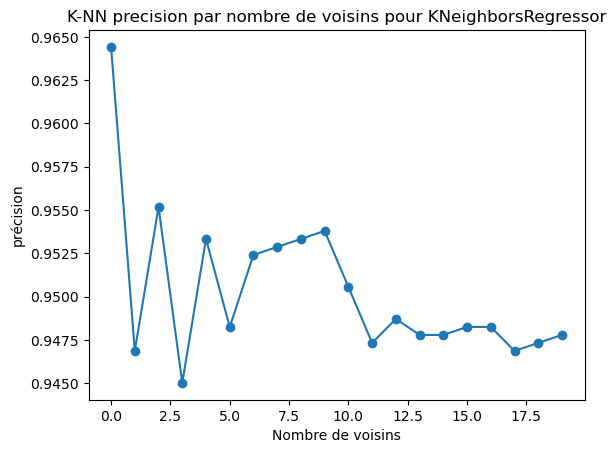

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

La valeur optimale de k est 1, pour une accuracy cross-validée de 96%.
[15. 15. 15. ... 15. 15. 15.]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    

In [105]:
knnreg = KNeighborsRegressor(n_neighbors=7)
knnreg.fit(x_train, y_train)
y_test_pred = knnreg.predict(x_test)
print(y_test_pred)
neighbors = np.arange(1,21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i] = knn.score(x_train,y_train)
    test_accuracy[i] = knn.score(x_test,y_test)

#visualisation taux de precision
plt.plot(test_accuracy,'o-')
plt.title('K-NN precision par nombre de voisins pour KNeighborsRegressor')
plt.xlabel('Nombre de voisins')
plt.ylabel('précision')
plt.show()
k_values = [1, 7, 9, 13, 15, 17, 19, 21]
params={'n_neighbors': k_values}
modelr = KNeighborsRegressor()
knnreg_cv = model_selection.GridSearchCV( modelr, params, cv=5, scoring='accuracy')
knnreg_cv.fit(x_train, y_train)
print("La valeur optimale de k est %d, pour une accuracy cross-validée de %.f%%."
 % (knnreg_cv.best_params_['n_neighbors'], (100*knnreg_cv.best_score_)))

#KNeighborRegressor pour le k optimale k=1
knnr2=KNeighborsRegressor(n_neighbors=1)
knnr2.fit(x_train,y_train)
y_pred2=knnr2.predict(x_test)
print(y_pred2)

In [106]:
#Calculer l'error moyennes avec RMSE et le coefficient R2
from sklearn import metrics
print("La RMSE de notre modèle est %.2f " % (metrics.mean_squared_error(y_test, y_test_pred)))
print("Le coefficient de détermination de notre modèle est R2 = %.2f" % (metrics.r2_score(y_test, y_test_pred)))

La RMSE de notre modèle est 3.04 
Le coefficient de détermination de notre modèle est R2 = 0.57


# 3)- Regression linéaire

In [107]:
linreg = LinearRegression()
linreg.fit(X, y)
print("Country prédit %.2f " % linreg.intercept_, end='')
y_pred = linreg.predict(X)
err0 = np.mean((linreg.predict(x_test) - y_test) ** 2)
print('erreur est',err0)

Country prédit 5.65 erreur est 6.113254731751061


Text(0, 0.5, 'Country prédit ')

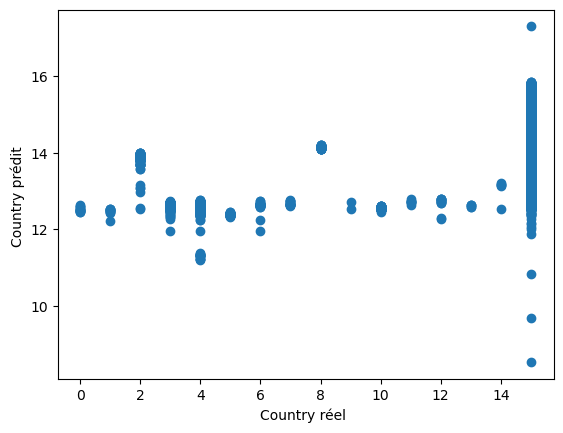

In [108]:
plt.scatter(y, y_pred)
plt.xlabel("Country réel ")
plt.ylabel("Country prédit ")

In [109]:
from sklearn import metrics
print("La RMSE de notre modèle est %.2f "
 % (metrics.mean_squared_error(y, y_pred, squared=False)))
print("Le coefficient de détermination de notre modèle est R2 = %.2f"
 % (metrics.r2_score(y, y_pred)))

La RMSE de notre modèle est 2.57 
Le coefficient de détermination de notre modèle est R2 = 0.13


# Generalization du performance

In [110]:
linreg.fit(x_train, y_train)
y_test_pred = linreg.predict(x_test)
print("La RMSE de notre modèle est %.2f " % (metrics.mean_squared_error(y_test, y_test_pred, squared=False)))
print("Le coefficient de détermination de notre modèle est R2 = %.2f" % (metrics.r2_score(y_test, y_test_pred)))

La RMSE de notre modèle est 2.48 
Le coefficient de détermination de notre modèle est R2 = 0.13


# 4)- Regression Logistique

In [111]:
logreg = LogisticRegression(penalty='none')
logreg.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [112]:
print("La probabilité qu'un country soit United Kingdom=15  est prédite par:\n sigma %.2f "
 % logreg.intercept_[0])
y_pred = logreg.predict(x_test)

La probabilité qu'un country soit United Kingdom=15  est prédite par:
 sigma 0.00 


Accuracy = 93% des prédictions du modèle sur le jeu de test sont correctes.


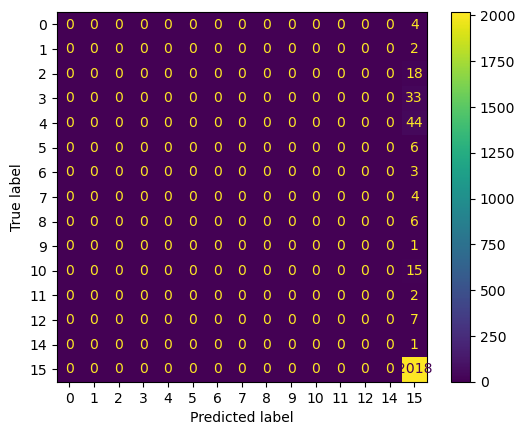

In [113]:
print("Accuracy = %.f%% des prédictions du modèle sur le jeu de test sont correctes."
 % (100*metrics.accuracy_score(y_test, y_pred)))
metrics.ConfusionMatrixDisplay.from_estimator(logreg, x_test, y_test)
plt.show()

# Séparation des données en K Folds

In [114]:
logreg1 = LogisticRegression()
kfold = KFold(n_splits=5, random_state=25, shuffle=True)

In [115]:
# Calculer la performance en validation croisée du modèle
results = cross_val_score(logreg1,
 x_train, y_train,
cv=kfold,
scoring='accuracy')
logreg1.fit(x_train, y_train)
y_pred = logreg1.predict(x_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [ ]:
print("Accuracy test = %.f%% des prédictions du modèle sur le jeu de test sont correcte"
 % (100*metrics.accuracy_score(y_test, y_pred)))
metrics.ConfusionMatrixDisplay.from_estimator(logreg1, x_test, y_test)
plt.show()

Accuracy test = 93% des prédictions du modèle sur le jeu de test sont correcte


In [ ]:
from sklearn import linear_model
ridge = linear_model.Ridge()
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([err0, np.mean((ridge.predict(x_test) - y_test) **2)])

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [ ]:
min(errors)

In [ ]:
lasso = linear_model.Lasso()
n_alphas = 30
alphas = np.logspace(-5, 1, n_alphas)
coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([err0, np.mean((lasso.predict(x_test) - y_test) ** 2)])

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [ ]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [ ]:
min(errors)

# Réseaux de Neurones

# 1)- Réseaux de neurones pour la classification

In [ ]:
from sklearn import neural_network

In [ ]:
model = neural_network.MLPClassifier(hidden_layer_sizes=10,
activation='logistic',
solver='lbfgs',
max_iter=1500,
random_state=47)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [ ]:
print("%d country United Kingdom ont été correctement prédits."
% metrics.confusion_matrix(y_test, y_pred)[14, 14])
print("%.f%% des prédictions du modèle sur le jeu de test sont correctes."
% (100*metrics.accuracy_score(y_test, y_pred)))
metrics.plot_confusion_matrix(model, x_test, y_test)

# 2)- Réseaux de neurones pour la régression

In [ ]:
modelR = neural_network.MLPRegressor(hidden_layer_sizes=15,
solver='lbfgs',
max_iter=1000,
random_state=47)

modelR.fit(x_train, y_train)
y_pred = modelR.predict(x_test)
print(modelR.intercepts_)
print(modelR.coefs_)

print("RMSE = %.2f "
% (metrics.mean_squared_error(y_test, y_pred, squared=False)))
print("Le coefficient de détermination R2 = %.2f"
% (metrics.r2_score(y_test, y_pred)))
plt.scatter(y_test, y_pred)
plt.xlabel("Countrys réel (g)")
plt.ylabel("Countrys prédit (g)")